# Data Visulalization / Exploratory Data Analysis

In [49]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [50]:
# read data
df=pd.read_csv('dataset_2000_Person_Gender_Height_Weight_Index.csv')

In [51]:
df

,Gender,Height in ft,Weight in kg,Index
0,Male,5.721846,80.778476,2
1,Male,6.065286,91.096331,2
2,Male,5.719413,84.158730,2
3,Male,5.743300,88.123328,3
4,Male,5.911665,90.559034,2
...,...,...,...,...
1995,Female,5.334471,55.253387,1
1996,Female,5.175008,49.599945,0
1997,Female,5.437808,67.826255,3
1998,Female,5.670012,73.428455,3


There are 2000 rows and 4 columns

Height and Weight are quantitative variables 

Gender and Index are categorical vaiables

Height has numerical value in feets

Weight has numerical value in kg

Gender has categorical value

(Male or Female)

Index has categorical value (0, 1, 2, 3, 4) for various categories of health status

In [52]:
# dataset info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 4 columns):
Gender          2000 non-null object
Height in ft    2000 non-null float64
Weight in kg    2000 non-null float64
Index           2000 non-null int64
dtypes: float64(2), int64(1), object(1)
memory usage: 62.6+ KB


## Handle categorical variables with numerically coded values

Gender is categorical variable 

so, convert into numerical values

1 - Male

0 - Female

In [53]:
# dummy of dataset
dummy=df
dummy['Gender'].replace(['Male','Female'],[1,0],inplace=True)
dummy

,Gender,Height in ft,Weight in kg,Index
0,1,5.721846,80.778476,2
1,1,6.065286,91.096331,2
2,1,5.719413,84.158730,2
3,1,5.743300,88.123328,3
4,1,5.911665,90.559034,2
...,...,...,...,...
1995,0,5.334471,55.253387,1
1996,0,5.175008,49.599945,0
1997,0,5.437808,67.826255,3
1998,0,5.670012,73.428455,3


## Perform univariate and bivariate analysis and derive meaningful insights about the dataset

### Univariate Analysis

Categorical Variables

-Gender

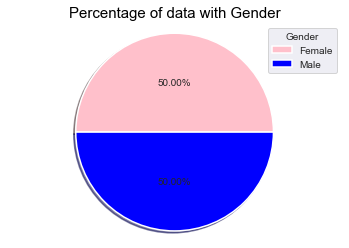

In [54]:
Gen=['Female','Male']
color=['pink','blue']

plt.pie(dummy.groupby('Gender').count()['Weight in kg'],
        colors=color,
        autopct='%1.2f%%',
        pctdistance=0.5,
        shadow=True,
        wedgeprops={"edgecolor":"1",'linewidth': 1.5,'linestyle': 'solid', 'antialiased': True}
       )

plt.axis('equal')  
plt.legend(Gen,title="Gender",loc='upper right')
plt.title('Percentage of data with Gender',color='black',size=15)
plt.show()

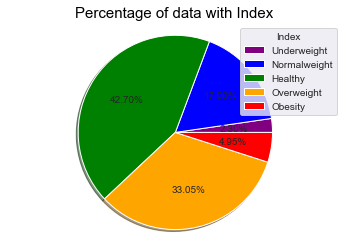

In [66]:
Index=['Underweight', 'Normalweight', 'Healthy', 'Overweight', 'Obesity']
color=['purple','blue','green','orange','red']

plt.pie(dummy.groupby('Index').count()['Weight in kg'],
        colors=color,
        autopct='%1.2f%%',
        pctdistance=0.6,
        shadow=True,
        wedgeprops={"edgecolor":"1",'linewidth': 1,'linestyle': 'solid', 'antialiased': True}
       )

plt.axis('equal')  
plt.legend(Index,title="Index",loc='upper right')
plt.title('Percentage of data with Index',color='black',size=15)
plt.show()

## Quantitative Variable

Height

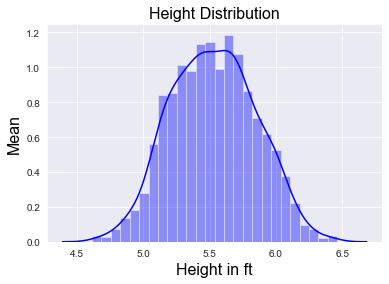

In [56]:
sns.set_style('darkgrid')  
sns.distplot(dummy['Height in ft'],color='b')
plt.title('Height Distribution',color='black',size=16)
plt.xlabel('Height in ft',color='black',size=16)
plt.ylabel('Mean',color='black',size=16)
plt.show()

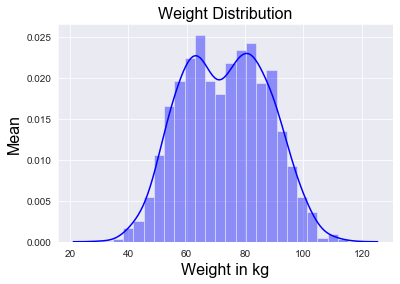

In [57]:
sns.set_style('darkgrid')  
sns.distplot(dummy['Weight in kg'],color='blue')
plt.title('Weight Distribution',color='black',size=16)
plt.xlabel('Weight in kg',color='black',size=16)
plt.ylabel('Mean',color='black',size=16)
plt.show()

## Bivariate Analysis

With respect to Gender

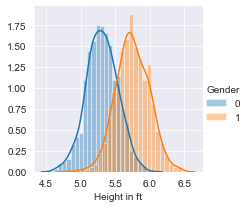

In [58]:
sns.FacetGrid(dummy,hue="Gender").map(sns.distplot,"Height in ft").add_legend()
plt.show()

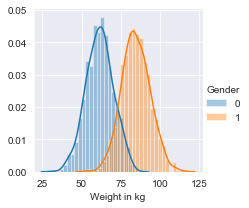

In [59]:
sns.FacetGrid(dummy,hue="Gender").map(sns.distplot,"Weight in kg").add_legend()
plt.show()

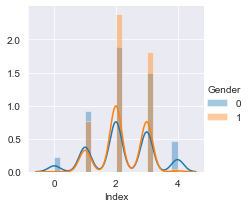

In [36]:
sns.FacetGrid(dummy,hue="Gender").map(sns.distplot,"Index").add_legend()
plt.show()

## Identify and treat missing values and check dataset outliers 

In [60]:
# for missing values
dummy.isnull().sum()

Gender          0
Height in ft    0
Weight in kg    0
Index           0
dtype: int64

 No missing values

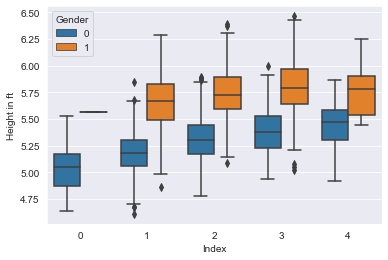

In [61]:
# for outliers
sns.boxplot(x='Index',y='Height in ft',hue='Gender',data=dummy)
plt.show()

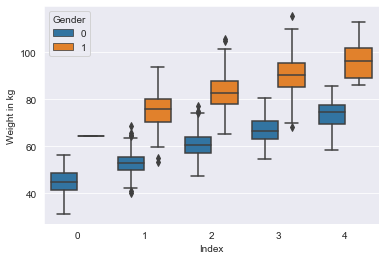

In [39]:
# for outliers
sns.boxplot(x='Index',y='Weight in kg',hue='Gender',data=dummy)
plt.show()

## Build a correlation matrix to identify relevant variables ( Graph )

In [40]:
# correlation matrix
corrMatrix=dummy.corr()
corrMatrix

,Gender,Height in ft,Weight in kg,Index
Gender,1.000000,0.688990,0.793599,0.005214
Height in ft,0.688990,1.000000,0.926277,0.227543
Weight in kg,0.793599,0.926277,1.000000,0.432294
Index,0.005214,0.227543,0.432294,1.000000


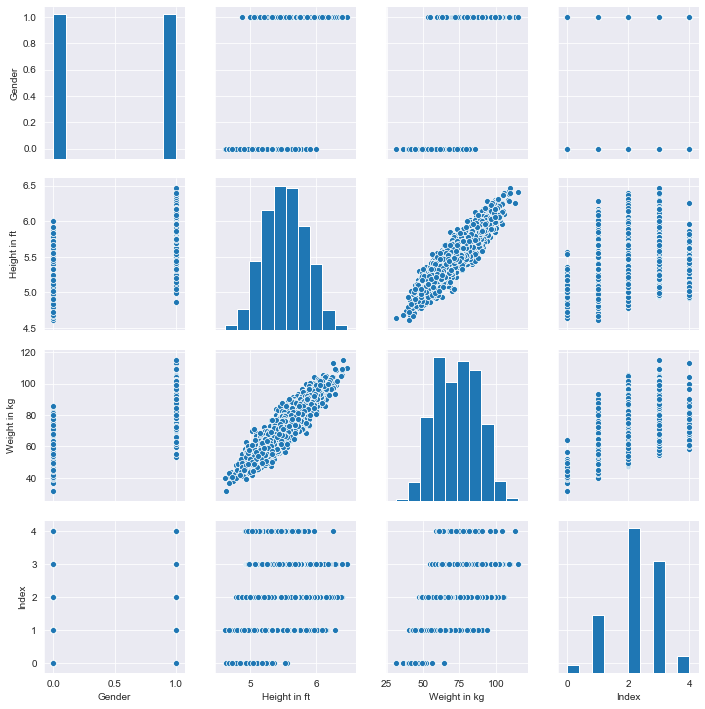

In [41]:
sns.pairplot(dummy)
plt.show()

These 16 graphs are described below :

1-Dataset contain equal instance of data for both male and female

2-There is equally spread of height on the basis gender

3-There is equally spread of weight on the basis gender

4-There is equally spread of index on the basis gender


5-There is equally data of height for both gender

6-This is the distribuion of height

7-This is very good correlated value for Height and Weight

8-There is equally data of height for all index

9-There is equally data of weight for both gender

10-This is strongly correlated value for Weight and Height

11-This is the distribuion of weight

12-There is equally data of weight for all index

13-There is equally data of all indexes for both gender

14-This is for the distribuion of height over indexes

15-This is for the distribuion of weight over indexes

16-There is the distribuion of all indexes (0,1,2,3,4)